# PBCテスト水準で書き下す：問9〜問12

このページは、**PBCテスト水準**（問題（入力）→手順（処理）→期待結果（判定）をそのまま実装できる粒度）で、
問9〜問12の仕様を整理したもの。選択肢文言は画像から読み取れた範囲で再現し、
判定条件は数式・不変量で固定する。

---

# 問9（χ²検定・クラメールV・対応分析）— PBCテスト仕様

## 前提データ（入力）

- クロス集計表：年代（10代/20代/30代/40代/50代/60代）×メディア（テレビ/ラジオ/新聞/雑誌/インターネット/その他/書籍…）の度数表
- 与えられている統計量：
  - $\chi^2 = 116.52$
  - $n = 1500$
  - $k = \min(r-1, c-1)=5$
- 図1：メディアと年代の対応分析バイプロット

### 図（概念図）：年代×メディアのクロス集計ヒートマップ
※ ここでは説明用のダミー度数で可視化（実データがある場合は置換する）。

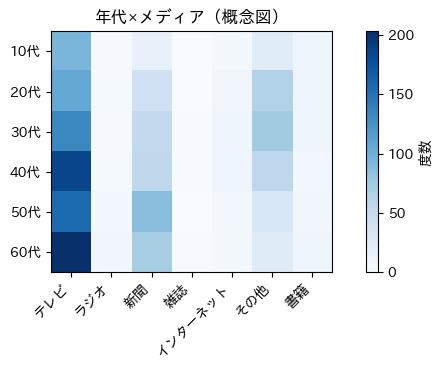

In [1]:
import japanize_matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

ages = ["10代", "20代", "30代", "40代", "50代", "60代"]
media = ["テレビ", "ラジオ", "新聞", "雑誌", "インターネット", "その他", "書籍"]

np.random.seed(0)
base = np.array([
    [94, 2, 15, 0, 4, 23, 10],
    [106, 3, 41, 0, 7, 64, 9],
    [133, 2, 53, 1, 9, 73, 8],
    [186, 3, 55, 1, 8, 56, 6],
    [157, 6, 87, 0, 5, 31, 7],
    [203, 7, 69, 1, 4, 24, 8],
])

df = pd.DataFrame(base, index=ages, columns=media)

plt.figure(figsize=(7, 3.8))
plt.imshow(df.values, cmap="Blues")
plt.xticks(range(len(media)), media, rotation=45, ha="right")
plt.yticks(range(len(ages)), ages)
plt.colorbar(label="度数")
plt.title("年代×メディア（概念図）")
plt.tight_layout()
plt.show()

## (1)〔15〕セル度数をすべて $a$ 倍したときの変化（正解：④）

### 問題（入力）

- 度数表の全セルを $a$ 倍（$a=2,3,\dots$）
- 問：次の①〜⑤のうち最も適切な記述を選べ

**選択肢（OCR）**
1. $a$ を大きくしていくと，カイ二乗統計量，$P$ 値，クラメールの連関係数の値はすべて大きくなる。
2. $a$ を大きくしてもカイ二乗統計量，$P$ 値，クラメールの連関係数の値はすべて変わらない。
3. $a$ を大きくしていくと，カイ二乗統計量の値は大きくなるが，$P$ 値とクラメールの連関係数の値は小さくなる。
4. $a$ を大きくしていくと，カイ二乗統計量の値は大きく，$P$ 値は小さくなるが，クラメールの連関係数の値は変わらない。
5. $a$ を大きくしていくと，カイ二乗統計量の値とクラメールの連関係数の値は大きくなるが，$P$ 値は小さくなる。

### 処理（手順）

1. 度数 $O_{ij} 	o aO_{ij}$
2. 期待度数 $E_{ij} 	o aE_{ij}$
3. $\chi^2$ を計算式で変形：
   \[
   \chi^2(a)=\sum_{ij}\frac{(aO_{ij}-aE_{ij})^2}{aE_{ij}}=a\sum_{ij}\frac{(O_{ij}-E_{ij})^2}{E_{ij}}=a\chi^2(1)
   \]
4. $P$ 値：自由度不変、$\chi^2$ 増大 ⇒ $P$ 値減少
5. クラメールV：
   \[
   V(a)=\sqrt{\frac{\chi^2(a)}{(an)k}}=\sqrt{\frac{a\chi^2(1)}{a n k}}=V(1)
   \]

### 期待結果（判定）

- **$\chi^2$ は $a$ に比例して増える**
- **$P$ 値は小さくなる**
- **クラメールVは不変**
- これに一致する選択肢 → **④**

## (2)〔16〕「$P$ 値 < 0.01 かつ $V \approx 0.125$」の解釈（正解：①）

### 問題（入力）

- $\chi^2$ 適合度/独立性検定：$\chi^2=116.52$、自由度30（問題文）
- $P$ 値は 0.01 未満（$\chi^2$ 表より）
- クラメールV：
  \[
  V=\sqrt{\frac{116.52}{1500	imes 5}}\approx 0.125
  \]
- 問：①〜⑤のうち最も適切な解釈を選べ

**選択肢（OCR）**
1. クラメールの連関係数が 0.1 程度なので、年代とメディアの間に強い関係があるかどうかは疑わしい。また、$P$ 値が 0.01 未満なのは、標本サイズが大きいからであると考えられる。
2. クラメールの連関係数が 0.1 程度のときは、年代とメディアの間に有意な関係があるとは言えない。
3. クラメールの連関係数が 0.5 程度なので、年代とメディアの間に中程度の関係があると言える。
4. ピアソンのカイ二乗適合度検定の $P$ 値は 1% 未満であるから、年代とメディアの間には関連があると言える。
5. ピアソンのカイ二乗適合度検定は 5% 有意ではなく、クラメールの連関係数の値が 0.1 程度であることから、年代とメディアの間の関係の有無に関する情報を得ることはできない。

### 処理（手順）

1. $P$ 値の意味：帰無仮説（独立）の下でこの $\chi^2$ 以上になる確率
2. $V$ の意味：連関の強さ（効果量）
3. ルール：
   - $V\approx 0.1$ は **小さい連関（弱い）**
   - 標本サイズが大きいと、弱いズレでも $P$ 値が小さくなり得る

### 期待結果（判定）

- **統計的には有意（$P<0.01$）だが、$V$ が小さいので連関は弱い**
- これに一致する選択肢 → **①**

## (3)〔17〕対応分析バイプロットの解釈で不適切（正解：③）

### 問題（入力）

- 図1：対応分析バイプロット（年代点・メディア点）
- 問：①〜⑤のうち、バイプロットの解釈として適切でないもの

**選択肢（OCR）**
1. 10代の回答者は20代や30代と比べ、メディアの中でテレビを選択した割合が多い。
2. 20代、30代の回答者は他の世代に比べ、メディアの中でインターネットを選択した割合が多い。
3. 40代の回答者には、メディアの中で新聞が最も多く選択されている。
4. ラジオを選択した回答者の中で50代が占める割合は、書籍を選択した回答者の中で50代が占める割合よりも多い。
5. 60代の回答者は40代以下に比べて、メディアの中でテレビ、ラジオ、新聞を選択した割合が多い。

### 処理（手順）

対応分析の読みは基本的に：

- 点が近い ⇒ **相対的に関連が強い（独立からの偏りが似る）**
- ただし図だけでは：
  - 「どれが最多か」など **絶対度数の順位**は断定できない

### 期待結果（判定）

- **③が「新聞が最も多く選択されている」等の“最多（絶対量）断定”をしており不適切**
- よって正解 → **③**


---

## 【深掘り】χ²検定の本質と「p値・α・自由度」

チャットでの議論に基づき、χ²検定を「以前の比率の差の検定（Z検定）」と接続して整理します。

### 1. プーリングZ検定との関係：$\chi^2 = Z^2$
以前学習した「2標本比率の差の検定（プーリング）」は、以下のような統計量でした。
$$ Z = \frac{D}{\sqrt{\mathrm{Var}(D)}} $$
これは「1つの差（$D$）」を「その標準誤差（セルのばらつき）」で割って標準化したものです。

今回の $\chi^2$ 検定（独立性）は、これを**多次元に拡張して二乗和にしたもの**と言えます。
$$ \chi^2 = \sum \frac{(O-E)^2}{E} = \sum \left( \frac{O-E}{\sqrt{E}} \right)^2 $$
ここで $\frac{O-E}{\sqrt{E}}$ は「標準化残差」と呼ばれ、Z値に相当します。
実際、2×2のクロス集計表であれば、必ず $\boxed{\chi^2 = Z^2}$ が成り立ちます（自由度1）。

### 2. 自由度（Degrees of Freedom）
自由度は「自由に値を動かせるセルの数」です。
$r \times c$ の表では、行合計と列合計が固定されているため、自由に動けるのは $(r-1)(c-1)$ 個だけになります。
- 例（問9）：$6 \times 7$ 表 $\rightarrow (6-1)(7-1) = 30$

### 3. p値と有意水準 $\alpha$
以下のインタラクティブな図で、観測された $\chi^2$ 値が分布の「どこ」に位置するかを確認してください。
- **$\alpha$（有意水準）**：事前に決めた「棄却域」の広さ（赤色領域）。
- **$p$値**：観測されたデータ以上に極端な値が出る確率（青色領域）。

$$ p < \alpha \implies \text{有意（棄却）} $$


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2
from ipywidgets import FloatSlider, IntSlider, Dropdown, VBox, Output, Layout, HTML
from IPython.display import display, Latex

# インタラクティブなχ²分布の可視化
output_chi2 = Output()

def plot_chi2_interactive(df, obs_val, alpha):
    with output_chi2:
        output_chi2.clear_output(wait=True) # wait=True reduces flicker
        
        # X軸の範囲：観測値か臨界値の大きい方が収まるように
        crit_val = chi2.ppf(1 - alpha, df)
        x_max = max(crit_val * 1.5, obs_val * 1.2, 20)
        xs = np.linspace(0, x_max, 500)
        ys = chi2.pdf(xs, df)
        
        fig, ax = plt.subplots(figsize=(8, 4))
        # メインの分布
        ax.plot(xs, ys, label=f'$\chi^2$ distribution (df={df})', color='black', lw=1.5)
        
        # 1. アルファ領域（棄却域） - 赤色
        ax.fill_between(xs, ys, where=(xs >= crit_val), color='red', alpha=0.2, label=f'Rejection Region (\\alpha={alpha})')
        ax.axvline(crit_val, color='red', linestyle='--', label=f'Critical Val: {crit_val:.2f}')
        
        # 2. P値領域 - 青色斜線
        p_val = 1 - chi2.cdf(obs_val, df)
        ax.fill_between(xs, ys, where=(xs >= obs_val), facecolor='none', hatch='///', edgecolor='blue', label=f'P-value Region')
        ax.axvline(obs_val, color='blue', linestyle='-', lw=2, label=f'Observed: {obs_val:.2f}')
        
        # 判定
        result_text = "棄却 (Reject H0)" if p_val < alpha else "棄却できない (Fail to Reject H0)"
        result_color = "red" if p_val < alpha else "black"
        
        ax.set_title(f'Chi-squared Test (df={df})', fontsize=14)
        ax.set_xlabel('$\chi^2$ value')
        ax.set_ylabel('Density')
        ax.set_ylim(bottom=0)
        ax.legend(loc='upper right')
        
        display(fig)
        plt.close(fig)
        
        # 数値情報の表示
        info_html = f\"\"\"
        <div style="border: 1px solid #ccc; padding: 10px; border-radius: 5px; background-color: #f9f9f9;">
            <h3>判定結果: <span style="color: {result_color};">{result_text}</span></h3>
            <ul>
                <li><b>自由度 (df)</b>: {df}</li>
                <li><b>有意水準 ($\\alpha$)</b>: {alpha} (臨界値: {crit_val:.4f})</li>
                <li><b>観測値 (Observed)</b>: {obs_val:.4f}</li>
                <li><b>P値 (p-value)</b>: {p_val:.4g} ({p_val*100:.4f}%)</li>
            </ul>
            <p>
                判定ルール: $p < \\alpha$ ならば帰無仮説を棄却する。<br>
                (図で青い線が赤い点線より右にあれば棄却)
            </p>
        </div>
        \"\"\"
        display(HTML(info_html))

# ウィジェットの定義
df_slider = IntSlider(value=30, min=1, max=50, step=1, description='自由度 (df)', style={'description_width': 'initial'})
val_slider = FloatSlider(value=116.52, min=0, max=150, step=0.1, description='観測統計量 (χ²)', style={'description_width': 'initial'}, layout=Layout(width='50%'))
alpha_drop = Dropdown(options=[0.01, 0.05, 0.10], value=0.01, description='有意水準 (α)', style={'description_width': 'initial'})

def on_change(change):
    plot_chi2_interactive(df_slider.value, val_slider.value, alpha_drop.value)

df_slider.observe(on_change, names='value')
val_slider.observe(on_change, names='value')
alpha_drop.observe(on_change, names='value')

display(VBox([df_slider, val_slider, alpha_drop, output_chi2]))

# 初期表示
plot_chi2_interactive(df_slider.value, val_slider.value, alpha_drop.value)


<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
<>:22: SyntaxWarning: invalid escape sequence '\c'
<>:38: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_955661/3829587847.py:22: SyntaxWarning: invalid escape sequence '\c'
  ax.plot(xs, ys, label=f'$\chi^2$ distribution (df={df})', color='black', lw=1.5)
/tmp/ipykernel_955661/3829587847.py:38: SyntaxWarning: invalid escape sequence '\c'
  ax.set_xlabel('$\chi^2$ value')


SyntaxError: unexpected character after line continuation character (3829587847.py, line 47)

---

# 問10（回帰：OLS / AIC / L1 / L2 / Elastic Net）— PBCテスト仕様

## OLS / AIC / L1 / L2 / Elastic Net 比較まとめ

| 手法 | 目的/評価 | 正則化 | 係数の特徴 | 向いている状況 |
| --- | --- | --- | --- | --- |
| OLS | 残差平方和を最小化 | なし | 推定値は不偏だが分散が大きくなりやすい | 特徴量が少なく、多重共線性が弱いとき |
| OLS + AIC | AICでモデル選択 | なし（選択後の係数はOLS） | 一部の変数だけ残るが、係数は縮小しない | 変数選択を明示的にしたいとき |
| L1（Lasso） | 残差 + L1ペナルティ最小化 | L1 | 係数が0になりやすい（スパース） | 変数選択と解釈性を重視するとき |
| L2（Ridge） | 残差 + L2ペナルティ最小化 | L2 | 係数は縮小するが0にはなりにくい | 多重共線性が強いとき、安定化したいとき |
| Elastic Net | 残差 + L1/L2混合ペナルティ | L1+L2 | スパース性と安定性のバランス | 相関の強い特徴量が多いとき |

補足：AICは $-2\log L + 2k$ で、$k$ は説明変数数。Elastic Netは $\alpha$ を大きくするとL1寄り、小さくするとL2寄り。


### 図（概念図）：推定係数のパターン比較
OLS / AIC / L1 / L2 の典型パターンをダミー係数で可視化。

In [ ]:
features = np.arange(1, 11)
ols = np.array([0.9, 0.7, -0.2, 0.4, 0.3, -0.6, 0.2, -0.1, 0.5, -0.3])
ols_aic = np.array([0.9, 0.0, -0.2, 0.0, 0.3, 0.0, 0.2, 0.0, 0.5, 0.0])
lasso = np.array([0.6, 0.0, -0.1, 0.0, 0.2, 0.0, 0.1, 0.0, 0.3, 0.0])
ridge = ols * 0.5

plt.figure(figsize=(7, 3.8))
plt.plot(features, ols, marker='o', label='OLS')
plt.plot(features, ols_aic, marker='o', label='OLS + AIC')
plt.plot(features, lasso, marker='o', label='L1 (Lasso)')
plt.plot(features, ridge, marker='o', label='L2 (Ridge)')
plt.axhline(0, color='gray', linewidth=1)
plt.xticks(features)
plt.title("係数パターン（概念図）")
plt.legend()
plt.tight_layout()
plt.show()

## (1)〔18〕4手法と係数推定値プロットの対応（正解：⑤）

### 問題（入力）

- 4つの推定法：
  - (ア) OLS法
  - (イ) OLS + AIC（変数選択）
  - (ウ) L1正則化（Lasso）
  - (エ) L2正則化（Ridge）
- 図（ア）〜（エ）：各説明変数に対する推定係数の散布（または係数列の可視化）
- 問：対応として最も適切な選択肢①〜⑤

**選択肢（OCR）**
1. (ア) OLS法, (イ) L1正則化法, (ウ) OLS法 + AIC, (エ) リッジ回帰
2. (ア) OLS法, (イ) OLS法 + AIC, (ウ) L1正則化法, (エ) リッジ回帰
3. (ア) リッジ回帰, (イ) OLS法 + AIC, (ウ) L1正則化法, (エ) OLS法
4. (ア) OLS法, (イ) リッジ回帰, (ウ) L1正則化法, (エ) OLS法 + AIC
5. (ア) OLS法 + AIC, (イ) リッジ回帰, (ウ) L1正則化法, (エ) OLS法

### 処理（手順）

判定ルール（特徴量）：

- **OLS**：係数は基本ゼロにならない／縮小なし
- **Ridge（L2）**：係数はゼロになりにくいが全体が小さく縮む
- **Lasso（L1）**：多くの係数が **ちょうどゼロ**（スパース）
- **AIC変数選択 + OLS**：選ばれなかった変数はゼロ（スパース）だが、選ばれた係数はOLSなので縮小は弱い

### 期待結果（判定）

図の見え方（あなたのページの説明と一致させる）：

- (エ) が OLS
- (イ) が Ridge
- (ウ) が L1
- (ア) が OLS + AIC

この並びに一致する選択肢 → **⑤**

## (2)〔19〕Elastic Netで $\alpha=0.5$ の係数パス（正解：①）

### 問題（入力）

- Elastic Net目的関数：
  \[
  \sum_i (y_i-eta_0-\sum_k eta_k x_{ki})^2
  +\lambda\sum_k(\alpha|eta_k|+(1-\alpha)eta_k^2),\ 0\le\alpha\le1
  \]
- 図（ア）〜（エ）：$\alpha=0,0.5,0.7,1$ のいずれかで固定した係数パス
- 問：$\alpha=0.5$ に該当する図

**選択肢（OCR）**
1. (ア)
2. (イ)
3. (ウ)
4. (エ)

### 処理（手順）

判定ルール（スパース性の序列）：

- $\alpha=0$（Ridge）→ 非ゼロ係数が最後まで多い（0になりにくい）
- $\alpha=1$（Lasso）→ 非ゼロ係数が早く減る（0になりやすい）
- $\alpha=0.5$ → **中間**

図中の「上部の数字（非ゼロ係数数）」を比較：

- ずっと最大（例：168が並ぶ）→ $\alpha$ 小
- 早く小さくなる → $\alpha$ 大
- **その中間が $\alpha=0.5$**

### 期待結果（判定）

- $\alpha=0.5$ に対応するのは（ア）
- 選択肢 → **①**

---

# 問11（因子分析：共通性・バリマックス・因子得点）— PBCテスト仕様

### 図（概念図）：因子負荷量表と因子得点プロット

In [ ]:
loadings = pd.DataFrame({
    "第1因子": [0.96, 0.75, -0.71, -0.04, 0.00],
    "第2因子": [0.14, -0.08, 0.61, 0.94, 0.70],
    "共通性": [0.9412, 0.5689, 0.8762, 0.8852, 0.4900],
}, index=["高級感", "品質", "親しみ", "認知度", "所有率"])
loadings

In [ ]:
labels = list("ABCDEFGHIJ")
np.random.seed(1)
points = np.random.normal(0, 0.7, size=(10, 2))

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1])
for label, (x, y) in zip(labels, points):
    plt.text(x + 0.02, y + 0.02, label)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel("第1因子（洗練度）")
plt.ylabel("第2因子（普及度）")
plt.title("ブランド因子得点（概念図）")
plt.tight_layout()
plt.show()

## (1)〔20〕共通性から(ア)(イ)を求める（正解：①）

### 問題（入力）

- 表1：第1因子負荷、第2因子負荷、共通性 $h^2$
- 高級感：第1因子=0.96、第2因子=(ア)、共通性=0.9412
- 親しみ：第1因子=-0.71、第2因子=(イ)、共通性=0.8762
- 問：①〜⑤のうち正しい(ア)(イ)の組

**選択肢（OCR）**
1. (ア) 0.14, (イ) 0.61
2. (ア) -0.02, (イ) 1.59
3. (ア) -0.02, (イ) -0.17
4. (ア) 0.14, (イ) -0.17
5. (ア) -0.02, (イ) -0.61

### 処理（手順）

共通性（2因子）：

\[
h^2 = \ell_1^2+\ell_2^2
\]

1. 高級感：
   \[
   (ア)^2 = 0.9412 - 0.96^2 = 0.9412 - 0.9216 = 0.0196
   \Rightarrow |(ア)|=0.14
   \]
2. 親しみ：
   \[
   (イ)^2 = 0.8762 - (-0.71)^2 = 0.8762 - 0.5041 = 0.3721
   \Rightarrow |(イ)|=0.61
   \]
   符号は因子の向きで反転し得るので、選択肢判定は絶対値で行う。

### 期待結果（判定）

- $(ア)=0.14,\ (イ)=0.61$ に一致 → **①**

## (2)〔21〕バリマックス回転の性質（正解：④）

### 問題（入力）

- バリマックス回転で決まる因子軸の性質についての選択肢①〜⑤

**選択肢（OCR）**
1. 特定の因子のすべての項目での各因子負荷量の絶対値が1に近くなり、それ以外の因子の因子負荷量はすべて0に近くなる傾向にある。
2. 因子得点のプロットが均一に散らばる傾向にある。
3. 因子得点のプロットが軸の近くに配置される傾向にある。
4. 各因子について、いくつかの項目のみ因子負荷量の絶対値が1に近くなり、それ以外の項目では因子負荷量が0に近くなる傾向にある。
5. 各因子で各項目の因子負荷量が均一になる傾向にある。

### 処理（手順）

Varimaxの判定ルール：

- ある因子に対して **少数項目の負荷が大きく**、それ以外は **0に近い**
  （単純構造を促進、解釈しやすい）

### 期待結果（判定）

- 上のルールを述べている選択肢 → **④**

## (3)〔22〕ブランドの記述で不適切（正解：②）

### 問題（入力）

- 図1：ブランドの因子得点プロット
- 第1因子＝洗練度（右が高い）
- 第2因子＝普及度（上が高い）
- 問：①〜⑤で不適切な記述

**選択肢（OCR）**
1. AはB、C、D、Eに比べて洗練度、普及率ともに高い。
2. Cは相対的に洗練度が高くないブランドであるが、普及率も高い方ではない。
3. FはB、C、D、Eと比べると洗練度は相対的に低いが、普及率は高い。
4. Hは普及率の点で相対的に他のブランドに劣るが、I、Jに比べると洗練度は高いと言える。
5. Jは洗練度は高くないが、普及率は他のブランドに比べて高い。

### 処理（手順）

- 図から C の第1因子位置（洗練度）は相対的に右側（高い側）
- 「Cは洗練度が高くない」系の文は矛盾

### 期待結果（判定）

- 不適切 → **②**

---

# 問12（時系列：ACFコレログラム・成分分解）— PBCテスト仕様

### 図（概念図）：時系列・ACF・成分分解

In [ ]:
np.random.seed(2)
months = np.arange(60)
trend = np.linspace(280, 292, len(months))
season = 20 * np.sin(2 * np.pi * months / 12) + 10 * np.sin(2 * np.pi * months / 6)
noise = np.random.normal(0, 5, len(months))
series = trend + season + noise

plt.figure(figsize=(7, 3.2))
plt.plot(months, series)
plt.title("月次系列（概念図）")
plt.xlabel("月")
plt.ylabel("金額")
plt.tight_layout()
plt.show()

In [ ]:
def acf(x, nlags=24):
    x = np.asarray(x)
    x = x - x.mean()
    denom = np.dot(x, x)
    return np.array([np.dot(x[:-k], x[k:]) / denom for k in range(1, nlags + 1)])

lags = np.arange(1, 25)
vals = acf(series, nlags=24)

plt.figure(figsize=(7, 3.2))
plt.bar(lags, vals)
plt.axhline(0, color='gray', linewidth=1)
plt.title("ACF（概念図）")
plt.xlabel("lag")
plt.ylabel("ACF")
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(4, 1, figsize=(7, 6), sharex=True)
axes[0].plot(series)
axes[0].set_title("原系列")
axes[1].plot(season)
axes[1].set_title("季節成分")
axes[2].plot(trend)
axes[2].set_title("トレンド成分")
axes[3].plot(noise)
axes[3].set_title("不規則成分")
plt.tight_layout()
plt.show()

## (1)〔23〕コレログラム（正解：⑤）

### 問題（入力）

- 月次系列（2012/4〜2017/3）
- プロットから年周期（12か月）と半年周期（6か月）が強い
- 問：ACF図①〜⑤から最も適切なもの

### 処理（手順）

判定ルール：

- 年周期 ⇒ **lag=12,24,…** で正の相関ピーク
- 半年周期 ⇒ **lag=6,18,…** でも規則的なピーク
- よって「6と12の周期で有意スパイクが並ぶ」形が正解

### 期待結果（判定）

- その特徴を持つ図 → **⑤**

## (2)〔24〕成分分解で読み取れないもの（正解：⑤）

### 問題（入力）

- 図2：原系列／季節成分／トレンド成分／不規則成分
- ①〜⑤のうち「読み取れない」ものを選ぶ

**選択肢（OCR）**
1. 読み取れる。トレンド成分の動きからわかる。
2. 読み取れる。トレンド成分の値を読むと、約280から約292になっているので1万円程度の上昇がわかる。
3. 読み取れる。季節成分の動きから年に2回のピークが見られ、年2回のボーナスの影響であることがわかる。
4. 読み取れる。季節成分の値を読むと、約-50から150を超える差があるので20万円以上の差があることがわかる。
5. 読み取れない。不規則成分と季節成分を比較すると、不規則成分の分散にはなお季節性が残っていることがわかるので、ホワイトノイズとみなすことはできない。

### 処理（手順）

判定ルール：

- トレンドの増加・増加量・季節のピーク回数・季節振幅は **図から直接読める**
- しかし「不規則成分がホワイトノイズ」は、
  - 自己相関ゼロ
  - 分散一定
  - 系統的構造なし
  などの検定/診断が要るため、**図だけでは断定不可**

### 期待結果（判定）

- 読み取れない → **⑤**


---

## 【深掘り】時系列解析（AR・ACF）との統合

問12は、AR（自己回帰）モデルなどを適用する前の「診断（Pre-check）」に位置づけられます。
チャットでの議論に基づき、ARモデルの視点から問12を整理します。

### 1. ACF（自己相関関数）の本質
問12の(1)で選んだコレログラム（ACF）は、「時間方向の連鎖」を可視化したものです。
$$ \rho(h) = \frac{\mathrm{Cov}(X_t, X_{t-h})}{\sqrt{\mathrm{Var}(X_t)\mathrm{Var}(X_{t-h})}} $$
これは、問9の「標準化」と同じ思想（分散で割って比較可能にする）に基づいています。

| パターン | ACFの特徴 | 診断 |
| :--- | :--- | :--- |
| **AR(1)** | 指数的に滑らかに減衰する | 短期的な記憶がある（定常） |
| **ランダムウォーク** | 長期間高い値がベタっと残る | 非定常（差分が必要） |
| **季節性（問12）** | 周期的なラグ（6, 12...）でスパイクが立つ | 季節調整が必要（SARIMA等） |

問12のデータは「季節性」が支配的であるため、AR(1)のような減衰型ではなく、周期的なスパイク型（選択肢⑤）になります。

### 2. 「残差がホワイトノイズ」とは？
問12の(2)で「図からは読み取れない」とされた「不規則成分がホワイトノイズである」という主張。
これは「モデルがデータの構造をすべて吸い尽くしたか（＝残りはただの雑音か）」という**最終確認**のことです。

分解図の「不規則成分」を目で見ただけでは、以下は保証できません：
- **無相関性**（Ljung-Box検定などで確認が必要）
- **等分散性**（分散が一定か）

したがって、図だけで「ホワイトノイズだ」と断定するのは時期尚早（不適切）となります。


---

# 使い方（実装目線の最短）

- (15)(16)(20)は **式で確定**（数値テスト）
- (17)(18)(19)(21)(22)(23)(24)は **“判定ルール”**で確定（ルールベーステスト）
  - 図が必要なものは「**図から読める特徴量**」に落として判定する（例：非ゼロ係数数、周期スパイクの位置、点の相対位置、など）

必要なら、この仕様をそのまま `pytest` 形式にして、

- 入力（数値・テキスト化した特徴量）
- assert（期待結果）

に落とした **テストコード一式**も出せる。